In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("airquality.csv")

In [6]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,NaN,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,NaN,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,NaN,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,NaN,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,NaN,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [12]:
df.shape


(25555, 16)

In [13]:
df.columns.tolist()

['City',
 'Date',
 'PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene',
 'AQI',
 'AQI_Bucket']

In [21]:
df.dtypes

City                  object
Date          datetime64[ns]
PM2.5                float64
PM10                 float64
NO                   float64
NO2                  float64
NOx                  float64
NH3                  float64
CO                   float64
SO2                  float64
O3                   float64
Benzene              float64
Toluene              float64
Xylene               float64
AQI                  float64
AQI_Bucket            object
year                   int32
month                  int32
day                    int32
dtype: object

In [14]:
df.isna().sum()

City              0
Date              0
PM2.5          4255
PM10          10702
NO             4509
NO2            3159
NOx            4021
NH3            9785
CO             1999
SO2            3499
O3             3510
Benzene        5122
Toluene        7409
Xylene        16417
AQI            4251
AQI_Bucket     4251
dtype: int64

In [15]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,21300.000000,14853.000000,21046.000000,22396.000000,21534.000000,15770.000000,23556.000000,22056.000000,22045.000000,20433.000000,18146.000000,9138.000000,21304.000000
mean,72.824121,127.653183,17.658008,29.481695,33.835887,25.667720,2.466555,15.097498,34.430208,3.324202,9.148687,3.224390,177.582473
std,67.356092,94.974574,22.539144,25.278898,32.688813,27.379991,7.499295,19.299535,21.411852,16.887308,21.316590,6.726918,147.398293
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,32.157500,62.340000,5.900000,12.197500,13.422500,9.342500,0.530000,5.570000,19.010000,0.130000,0.730000,0.120000,85.000000
50%,53.090000,102.770000,9.950000,22.340000,24.570000,18.185000,0.930000,9.120000,30.880000,0.980000,2.930000,0.840000,126.000000
75%,87.210000,161.180000,19.717500,38.430000,42.167500,33.050000,1.520000,15.610000,45.430000,2.850000,8.987500,3.370000,230.000000
max,949.990000,1000.000000,351.300000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [ ]:
# 3) Parse dates and basic time features--------------

df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day

In [17]:
# 4. Categorical overview---------------

print("\nNumber of cities:", df["City"].nunique())


Number of cities: 22


In [18]:
print("Sample cities:", df["City"].unique()[:10])

Sample cities: ['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Bhopal'
 'Brajrajnagar' 'Chandigarh' 'Chennai' 'Delhi']


In [19]:
print("\nAQI bucket counts:\n", df["AQI_Bucket"].value_counts(dropna=False))


AQI bucket counts:
 AQI_Bucket
Moderate        7502
Satisfactory    6570
NaN             4251
Poor            2674
Very Poor       2308
Severe          1329
Good             921
Name: count, dtype: int64


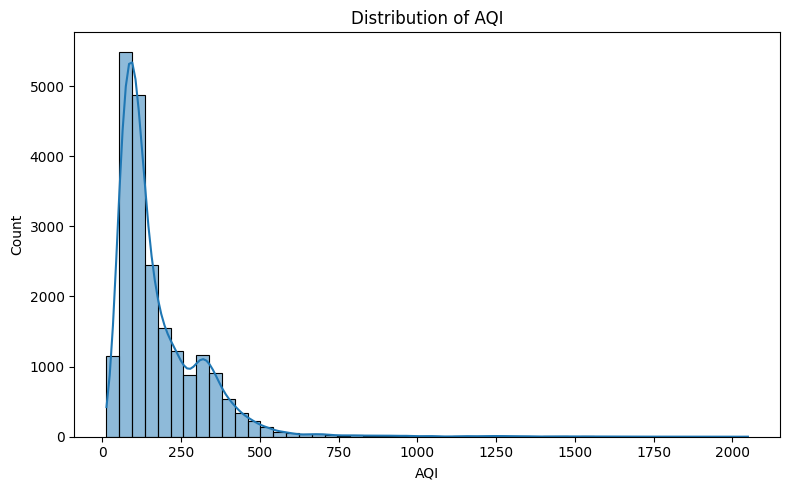

In [20]:
# 5. Distribution of AQI overall---------------------

plt.figure(figsize=(8, 5))
sns.histplot(df["AQI"], bins=50, kde=True)
plt.title("Distribution of AQI")
plt.xlabel("AQI")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


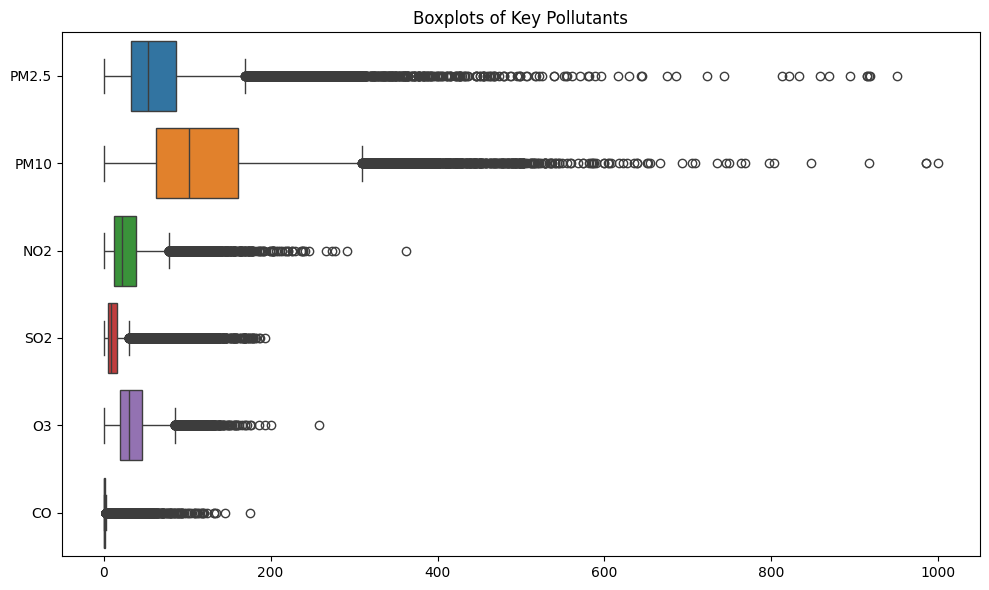

In [23]:
# 6. Boxplots of key pollutants----------------------

pollutants = ["PM2.5", "PM10", "NO2", "SO2", "O3", "CO"]
pollutants = [p for p in pollutants if p in df.columns]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[pollutants], orient="h")
plt.title("Boxplots of Key Pollutants")
plt.tight_layout()
plt.show()

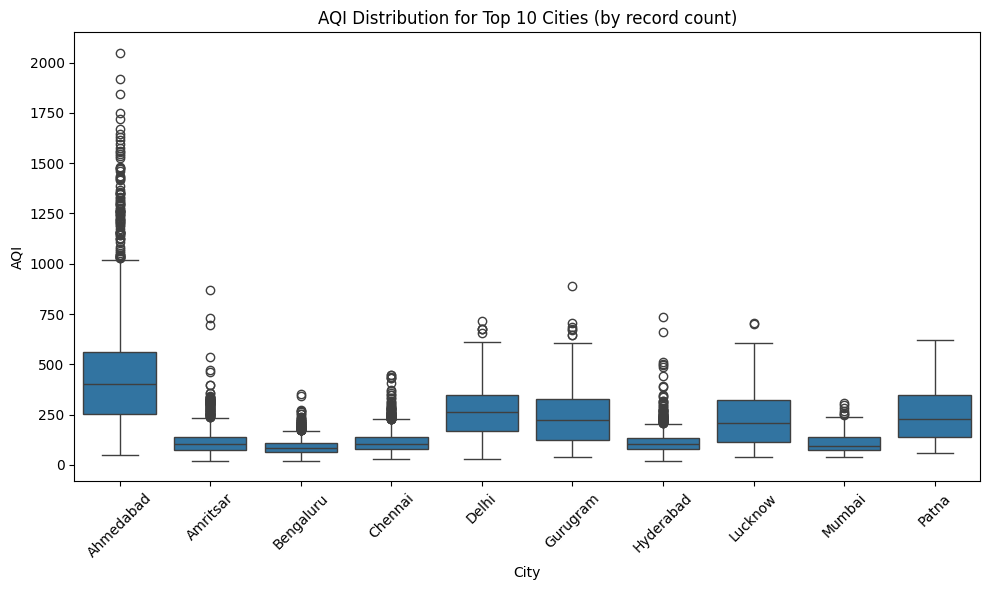

In [24]:
# 7. AQI by city (top N cities by count)-------------------------------

city_counts = df["City"].value_counts()
top_cities = city_counts.head(10).index

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df[df["City"].isin(top_cities)],
    x="City",
    y="AQI"
)
plt.xticks(rotation=45)
plt.title("AQI Distribution for Top 10 Cities (by record count)")
plt.tight_layout()
plt.show()